# Proyecto Final - Precios de SUVs 

In [1]:
%load_ext autoreload
%autoreload 2

### Analisis dataset

-hay dos columnas precio y moneda, paso a precio en dolares
-sacar version
-dejaste muchas features creo
-en ves de one hotear marcas dividir en gama baja media y alta
-borraria color, muchas distintas y capaz poca relevancia
-eliminaria camara de retroceso 13000 nans


In [2]:
import pandas as pd
# Cargar el dataset
df_raw = pd.read_csv("dataset/raw/pf_suvs_i302_1s2025.csv")
df_raw = pd.DataFrame(df_raw)

In [3]:
from src.data_exploration import*

In [4]:

exploratory_analysis(df_raw, target_col="Precio")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               18254 non-null  int64  
 1   Marca                    18254 non-null  object 
 2   Modelo                   18254 non-null  object 
 3   Año                      18254 non-null  float64
 4   Versión                  18254 non-null  object 
 5   Color                    17865 non-null  object 
 6   Tipo de combustible      18254 non-null  object 
 7   Puertas                  18254 non-null  float64
 8   Transmisión              18239 non-null  object 
 9   Motor                    18216 non-null  object 
 10  Tipo de carrocería       18254 non-null  object 
 11  Con cámara de retroceso  4691 non-null   object 
 12  Kilómetros               18254 non-null  object 
 13  Título                   18254 non-null  object 
 14  Precio                

In [5]:
df_raw["Moneda"].value_counts()

Moneda
$      11158
US$     7096
Name: count, dtype: int64

In [6]:
df_raw["Marca"].value_counts()

Marca
Ford              2161
Jeep              2050
Volkswagen        2037
Chevrolet         1750
Renault           1491
Toyota            1260
Peugeot           1250
Nissan            1059
Citroën            721
BMW                672
Honda              597
Hyundai            568
Audi               529
Fiat               366
Chery              344
Kia                290
Mercedes-Benz      282
Dodge              185
BAIC               165
Suzuki              76
Porsche             67
Land Rover          65
Mitsubishi          47
Volvo               38
SsangYong           30
D.S.                27
Alfa Romeo          25
JAC                 19
Jetour              14
GWM                  9
Haval                9
Isuzu                8
Lifan                7
Lexus                7
Subaru               5
Daihatsu             4
D·S                  4
Mini                 3
Hiunday              2
KAIYI                2
DS AUTOMOBILES       2
Jaguar               2
Range Rover          1
Rrena

In [7]:
df_raw["Transmisión"].value_counts()

Transmisión
Automática               12281
Manual                    5834
Automática secuencial      123
Semiautomática               1
Name: count, dtype: int64

In [8]:
df_raw["Tipo de vendedor"].value_counts()

Tipo de vendedor
concesionaria    8509
particular       5676
tienda           4069
Name: count, dtype: int64

In [9]:
df_raw["Tipo de carrocería"].value_counts()

Tipo de carrocería
SUV    18254
Name: count, dtype: int64

In [10]:
df_raw["Tipo de combustible"].value_counts()

Tipo de combustible
Nafta            16067
Diésel            1328
Nafta/GNC          451
Híbrido/Nafta      269
Híbrido            105
GNC                 12
Eléctrico           12
Mild Hybrid         10
Name: count, dtype: int64

In [ ]:
from src.data_cleaner import DataProcessor

In [12]:
dp = DataProcessor(df_raw)
df = pd.DataFrame(dp.preprocess())

df.to_csv("dataset/processed/pf_suvs_i302_1s2025_new.csv", index=False)


In [13]:
exploratory_analysis(df,target_col="Precio_usd")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17781 entries, 0 to 17780
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marca                17781 non-null  object 
 1   Modelo               17781 non-null  object 
 2   Puertas              17781 non-null  float64
 3   Kilómetros           17781 non-null  float64
 4   Precio_usd           17781 non-null  float64
 5   Antigüedad           17781 non-null  float64
 6   Cilindrada           17781 non-null  float64
 7   Transmisión_Manual   17781 non-null  int64  
 8   vendedor_particular  17781 non-null  int64  
 9   combustible_Diésel   17781 non-null  bool   
 10  combustible_Nafta    17781 non-null  bool   
 11  combustible_Otros    17781 non-null  bool   
dtypes: bool(3), float64(5), int64(2), object(2)
memory usage: 1.3+ MB
None

--- Resumen Estadístico ---
            Puertas    Kilómetros     Precio_usd     Antigüedad    Cilindrada  \
count

In [14]:
df["Marca"].value_counts()

Marca
Ford             2100
Jeep             2013
Volkswagen       1987
Chevrolet        1705
Renault          1443
Toyota           1226
Peugeot          1220
Nissan           1012
Citroën           705
BMW               640
Honda             592
Hyundai           555
Audi              526
Fiat              361
Chery             339
Kia               287
Mercedes-Benz     281
Dodge             185
BAIC              162
Suzuki             74
Porsche            64
Land Rover         60
Mitsubishi         46
Volvo              32
SsangYong          30
Alfa Romeo         24
D.S.               20
JAC                19
Jetour             14
GWM                 9
Isuzu               8
Lifan               7
Lexus               7
Haval               5
Subaru              5
D·S                 4
Daihatsu            4
Hiunday             2
KAIYI               2
Jaguar              2
Rrenault            1
Jetur               1
hiunday             1
Vol                 1
Name: count, dtype: int64

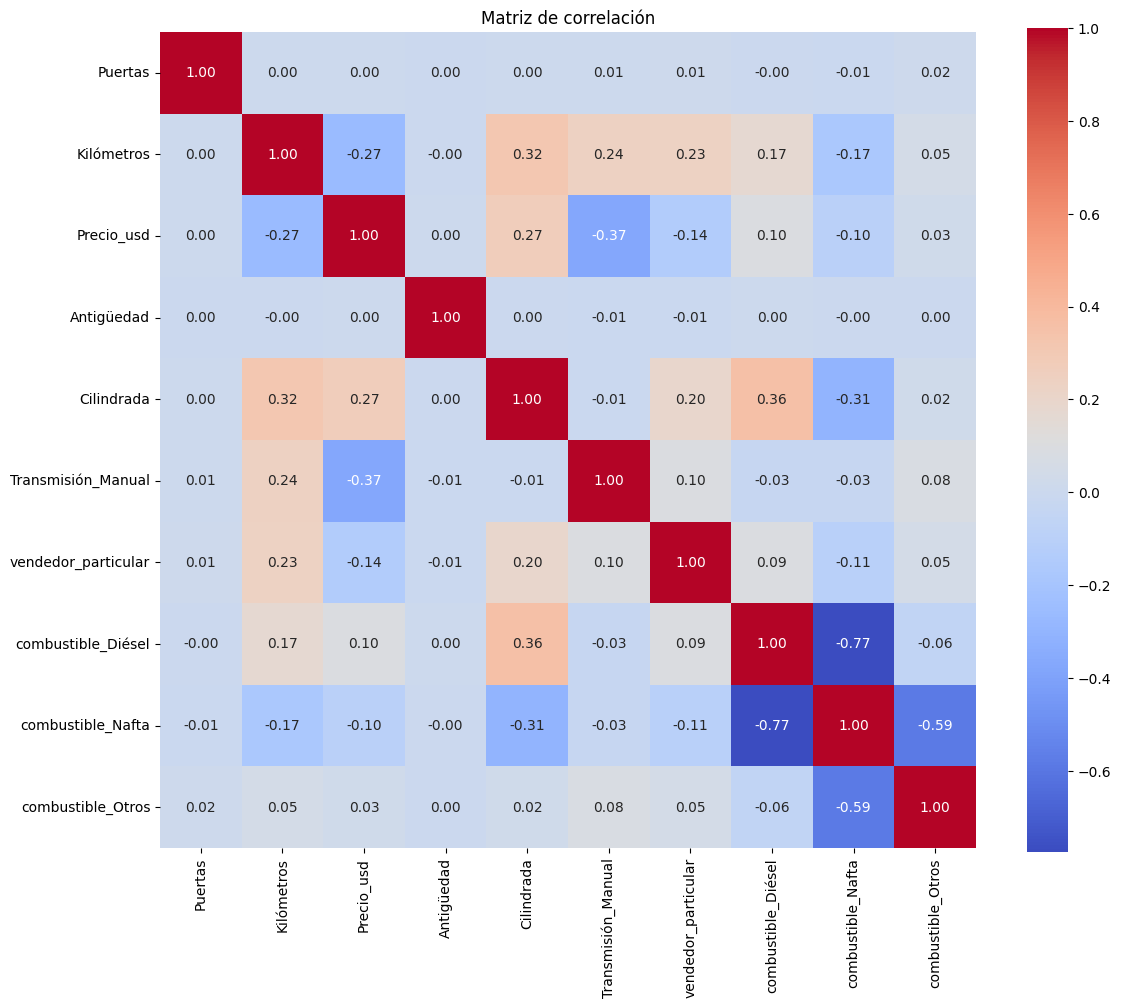

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo columnas numéricas reales
num_cols = df.select_dtypes(include=["float64", "int64", "bool"])

# Matriz de correlación
corr = num_cols.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()



In [16]:
# Distintos datasets

df = df.drop(columns=["Marca","Modelo"])



In [20]:
exploratory_analysis(df, target_col="Precio_usd")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17781 entries, 0 to 17780
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Puertas              17781 non-null  float64
 1   Kilómetros           17781 non-null  float64
 2   Precio_usd           17781 non-null  float64
 3   Antigüedad           17781 non-null  float64
 4   Cilindrada           17781 non-null  float64
 5   Transmisión_Manual   17781 non-null  int64  
 6   vendedor_particular  17781 non-null  int64  
 7   combustible_Diésel   17781 non-null  bool   
 8   combustible_Nafta    17781 non-null  bool   
 9   combustible_Otros    17781 non-null  bool   
dtypes: bool(3), float64(5), int64(2)
memory usage: 1.0 MB
None

--- Resumen Estadístico ---
            Puertas    Kilómetros     Precio_usd     Antigüedad    Cilindrada  \
count  17781.000000  1.778100e+04   17781.000000   17781.000000  17781.000000   
mean      18.522243  7.518157e+05   

In [23]:



df_train = df.sample(frac=0.8, random_state=42)
y = df["Precio_usd"].values
X = df.drop(columns=["Precio_usd"]).values
df_val = df.drop(df_train.index)
y_val = df_val["Precio_usd"].values
X_val = df_val.drop(columns=["Precio_usd"]).values

dp_train = DataProcessor(df_train)
X = dp_train.normalize(X)
X_val = dp_train.normalize_new_data(X_val)


In [18]:
print(X.shape, y.shape)
print(X_val.shape, y_val.shape)

(17781, 9) (17781,)
(3556, 9) (3556,)


In [ ]:
from models.linear_regression import LinearReg

In [24]:
model = LinearReg(X, y,0, 0.001)
model.train_gd(0.01, 1000, "l2")
y_pred = model.predict(X_val)
rmse = model.rmse(y_val, y_pred)
print(f"RMSE: {rmse:.2f}")


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [ ]:
model.train_pinv("l2")
y_pred_pinv = model.predict(X_val)
rmse_pinv = model.rmse(y_val, y_pred_pinv)
print(f"RMSE con Pseudo-inversa: {rmse_pinv:.2f}")


UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [ ]:
model.train_pinv()
y_pred_pinv = model.predict(X_val)
rmse_pinv = model.rmse(y_val, y_pred_pinv)
print(f"RMSE con Pseudo-inversa: {rmse_pinv:.2f}")


RMSE con Pseudo-inversa: 9285.62
